## **Manipulación de datos con pandas**

### **Pandas**

En este módulo, profundizaremos en la creación de `DataFrames`, una de las estructuras de datos más versátiles y poderosas para la manipulación de información financiera. Exploraremos tres métodos distintos para construir DataFrames, cada uno con aplicaciones específicas en la industria bancaria.

Un `DataFrame` es una estructura bidimensional, similar a una tabla, que nos permite organizar y manipular datos con facilidad. En el contexto bancario, los DataFrames son ideales para manejar información de clientes, transacciones, productos financieros, y otros tipos de datos críticos.

Ahora carguemos el conjunto de datos de **marketing del banco** `bank-full`. 

Los datos están relacionados con `campañas de marketing directo` (llamadas telefónicas) de una institución bancaria portuguesa.

Este conjunto de datos tiene 4521 observaciones y 17 variables. Las variables son:

* **age:** Edad del cliente.
* **job**: Profesión del cliente (por ejemplo, desempleado, servicios, gestión).
* **marital**: Estado civil del cliente (soltero, casado, divorciado).
* **education**: Nivel educativo del cliente (primaria, secundaria, terciaria).
* **default** : Indica si el cliente tiene crédito en incumplimiento (sí o no).
* **balance**: Saldo promedio anual de la cuenta bancaria del cliente.
* **housing**: Indica si el cliente tiene un préstamo hipotecario (sí o no).
* **loan**: Indica si el cliente tiene un préstamo personal (sí o no).
* **contact**: Tipo de comunicación de contacto (teléfono celular, teléfono fijo).
* **day**: Día del mes en que se realizó el último contacto con el cliente.
* **month**: Mes en que se realizó el último contacto con el cliente.
* **duration**: Duración del último contacto en segundos.
* **campaign**: Número de contactos realizados durante esta campaña de marketing.
* **pdays**: Días que han pasado desde que el cliente fue contactado por última vez en una campaña anterior (valores -1 indican que el cliente no fue contactado previamente).
* **previous**: Número de contactos realizados antes de esta campaña.
* **poutcome**: Resultado de una campaña de marketing anterior (éxito, fracaso, desconocido).
* **y**: Resultado de la campaña actual (si el cliente suscribió o no un depósito a plazo fijo).

In [ ]:
# importar librerias
import pandas as pd
import numpy as np

# Asignar la URL del archivo: url
url ='https://raw.githubusercontent.com/cdeoroaguado/Datos/refs/heads/main/datamanip/bank/bank-full.csv'

# leer el archivo en u dataframe:df
df = pd.read_csv(url,sep=';')

# Imprimir el encabezado del dataframe
df.head()

# Mostrar las 5 ultimas filas de DataFrame
df.tail()

Las dimensiones del dataset:

In [ ]:
# Obtener las dimensiones del DataFrame
df.shape

Información de la estructura del dataset de marketing:

In [ ]:
# Obtener información sobre la estructura del DataFrame
df.info()

El atributo `df.size` en pandas devuelve el número total de elementos en un `DataFrame`. Esto se calcula multiplicando el número de filas por el número de columnas. Es útil para obtener una visión rápida del tamaño total del DataFrame en términos de elementos.

In [ ]:
# número total de elementos en el dataframe
df.size

Puede ocurrir que el conjunto de datos de marketing para la banca tenga duplicados. El método `drop_duplicates()` en pandas se utiliza para eliminar filas duplicadas de un DataFrame. Este método permite identificar y remover filas que contienen los mismos valores en las columnas seleccionadas, o en todas las columnas si no se especifica ninguna.

In [ ]:
# Eliminar filas duplicadas
df = df.drop_duplicates()
df.info()

Ahora, el nombres de las variables, el indice, el tipo de dato del dataset de marketing

In [ ]:
# nombre de las variables
print(df.columns)

# Obtener el índice del DataFrame
print(df.index)

# tipo de dato
print(df.dtypes)

Queremos saber los clientes menores de 20 años:

In [ ]:
# Seleccionar solo las filas donde la condición es True
df.loc[:,'age'] < 20

# Mostrar los clientes menores de 20 años
dfm20 = df[df.loc[:,'age'] < 20]

# imprimir el dataframe las 5 primeras
dfm20.head()

Escojamos las columnas `age`, `marital`, `balance`, `y` de los clientes menores de 20

In [ ]:
# seleccionemos las columnas
new_dfm20 = dfm20[['age','marital','balance','y']]

# imprimir
print(new_dfm20.head())

Para saber quien tiene mayor balance en la cuenta de los menores de 20, debo ordenarlo usando el método `sort_values`: 

In [ ]:
# ordenar
new_dfm20.sort_values(by='balance',ascending=False)

Puedes aplicar una función personalizada a una columna específica del DataFrame usando el método `apply()` de `pandas`. Supongamos que deseas crear una nueva columna llamada `balance_category` que clasifique el balance de cada cliente en `"Bajo"`, `"Medio"` o `"Alto"` según ciertos umbrales.

In [25]:
# Definir una función para categorizar el balance
def categorizar_balance(balance):
    if balance < 500:
        return 'Bajo'
    elif 500 <= balance < 1500:
        return 'Medio'
    else:
        return 'Alto'

In [ ]:
# Aplicar la función 'categorizar_balance' a la columna 'balance'
# y crear la nueva columna 'balance_category'
new_dfm20.loc[:,'balance_category'] = new_dfm20['balance'].apply(categorizar_balance)

# Mostrar el DataFrame actualizado
print(new_dfm20.head())

:::{admonition} **Observación**
:class: warning

Podemos aplicar funciones que ya tienen implementadas python o podemos usar la función `lambda`

1. Con una función que tiene implementada `python`

```python
import math

new_dfm20['rounded_balance'] = new_dfm20['balance'].apply(math.ceil)
```

2. Con la función `lambda`

```python
new_dfm20['rounded_balance_to_100'] = new_dfm20['balance'].apply(lambda x: 100*math.ceil(x))
```
:::

Ahora, debemos obtener los clientes menores de 20 que si se suscribieron. Ademas los que se suscribieron con balance bajo.

In [ ]:
# menores de 20 que se suscribieron
# TU CODIGO

# Otra forma de seleccionarlos
# TU CODIGO

# menores de 20 que se suscribieron con balance bajo
# TU CODIGO

##### **Adición de nuevas columnas al DataFrame**

* Anade una columna `balance_por_age` al `DataFrame`. Del mismo modo, también podemos utilizar la suma, la resta y otros operadores matemáticos sobre dos columnas numéricas. 

In [ ]:
new_dfm20.loc[:,'balance_por_age'] = # TU CODIGO
print(new_dfm20.head())

* Ahora, veremos la adición condicional de columnas. Vamos a intentar añadir una columna basada en el valor de la edad, digamos que todo lo que sea más de 17 como mayor de edad (codificado como 1) y todo lo que sea inferior a 17 como menor de edad (codificado como 0).

In [ ]:
new_dfm20.loc[:,'age_cat'] = # TU CODIGO
print(new_dfm20.tail())

#### **Descripción estadística**

Exploraremos cómo obtener estadísticas de resumen detalladas para columnas específicas de un DataFrame, así como cómo realizar análisis estadísticos avanzados mediante agrupaciones y tablas dinámicas. Comenzaremos con el cálculo de métricas descriptivas básicas, tales como medias, medianas, y desviaciones estándar, para evaluar la distribución y variabilidad de los datos. A continuación, abordaremos técnicas para aplicar estas estadísticas a subconjuntos de datos mediante agrupaciones, permitiendo un análisis más granular y enfocado. 

Finalmente, dominaremos el uso de tablas dinámicas para sintetizar, visualizar y resumir datos complejos, facilitando la extracción de insights clave y patrones significativos en grandes volúmenes de información. Este enfoque integral fortalecerá tu capacidad para extraer, interpretar y comunicar hallazgos estadísticos de manera efectiva en el análisis de datos.

##### **Resumen estadístico univariado**

Calculemos las medidas descriptivas fundamentales, incluyendo la media, mediana, moda, varianza, desviación estándar y cuartiles, para proporcionar una visión general de la distribución de los datos. Usaremos el conjunto de datos.

1. Si la variable es *numérica* 


In [ ]:
# Descriptivo de una sola variable numérica solo promedio
# TU CODIGO

# Resumen descriptivo de una sola variable numérica
print(df['age'].agg(# TU CODIGO))

In [ ]:
# Descriptivo de una varias variable numérica solo promedio
# TU CODIGO
              
# Resumen descriptivo de varias variable numérica
result = pd.DataFrame({
    'Promedio': # TU CODIGO.mean(),
    'Desv. Estandar': # TU CODIGO.std(),
    'minimo': # TU CODIGO.min(),
    'maximo': # TU CODIGO.max(),
    'mediana': # TU CODIGO.median(),
    'Cuantil 1': # TU CODIGO.quantile(0.25),
    'Cuantil 3': # TU CODIGO.quantile(0.75)
})

# Mostrar los resultados
print(result.T)

2. Si la variable es *catégorica* 

In [ ]:
# Descriptivo de una sola variable categórica solo conteo
conteo = # TU CODIGO
print(conteo)

# Descriptivo de una sola variable categórica solo proporcion
proporciones = # TU CODIGO
print(proporciones)

# Combinar los resultados en un solo DataFrame
resultado = pd.DataFrame({
    'Conteo': conteo,
    'Proporción': proporciones
})

# imprimir
print(resultado)


In [ ]:
# Descriptivo de varias variable categórica solo conteo
conteo = # TU CODIGO
# print(conteo)

# Descriptivo de varias variable categórica solo proporcion
proporciones = # TU CODIGO
# print(proporciones)

# Combinar los resultados en un solo DataFrame
resultado = pd.DataFrame({
    'Conteo': conteo,
    'Proporción': proporciones
})

# imprimir
print(resultado)

##### **Resumen estadístico bivariado**

El resumen estadístico bivariado se refiere al estudio de dos variables simultáneamente para determinar si existe alguna relación o asociación entre ellas. Solo realizaremos las tablas para dicho análisis estadístico.

1. **Variable categórica vs variable numérica**

In [ ]:
# descriptivo edad según la suscripcion solo una variable
# TU CODIGO

var_num_cat = # TU CODIGO

# Mostrar los resultados
print(var_num_cat)

In [ ]:
# descriptivo edad según la suscripcion varias variable
# TU CODIGO

# Resumen descriptivo  de edad según la suscripcion solo una variable
var_num_cat = # TU CODIGO

# Renombrar las columnas resultantes
var_num_cat.columns = [
    'Edad_Promedio', 'Edad_Desviacion_Estandar', 'Edad_Minimo', 'Edad_Maximo', 'Edad_Mediana', 'Edad_Cuantil_1', 'Edad_Cuantil_3',
    'Balance_Promedio', 'Balance_Desviacion_Estandar', 'Balance_Minimo', 'Balance_Maximo', 'Balance_Mediana', 'Balance_Cuantil_1', 'Balance_Cuantil_3'
]

# imprimir
print(var_num_cat)

Para crear una **tabla de contigencia**, basta con tener dos variables categóricas. Por ejemplo

In [ ]:
# Otra forma de crear una tabla de contingencia
crosstab = # TU CODIGO
print(crosstab)

#### **Indices explicitos**

En Python, los **índices** son utilizados para acceder a elementos en estructuras de datos como listas, tuplas, y matrices (arrays). Un índice explícito se refiere a la práctica de definir de manera específica el índice que se va a utilizar para acceder a un elemento, en lugar de depender de la indexación automática por la posición.

:::{admonition} **Características de los Índices Explícitos**
:class: note
* **Flexibilidad**: Permiten el acceso a elementos específicos de una estructura de datos sin necesidad de recorrer secuencialmente todos los elementos.

* **Claridad**: Facilitan la lectura y comprensión del código al hacer evidente qué elementos se están accediendo o modificando.

* **Manipulación de Datos**: Hacen más sencillo realizar operaciones como reordenar elementos, filtrar,seleccionar, agrupar o acceder a subconjuntos de datos.

* **Compatibilidad con Pandas**: En bibliotecas como pandas, los índices explícitos son fundamentales para trabajar con Series y DataFrames, permitiendo indexar tanto por números como por etiquetas.

* **Precisión**: Al especificar el índice, reduces el riesgo de errores al manipular datos.

* **Eficiencia**: Mejoran la eficiencia al permitir operaciones directas sobre los elementos deseados.

:::


Visualicemos nuevamente el dataframe de marketing para la banca.

In [ ]:
# marco de datos
df.head()

Analicemos algunas funciones utiles de la indexación explicita:

* `df.set_index()`; Este método se usa para establecer una o más columnas del DataFrame como su índice. 

In [ ]:
# Establecer la columna 'job' como índice
# TU CODIGO

* `df.reset_index()`:Este método se usa para restablecer el índice del DataFrame, devolviendo los índices actuales a columnas y creando un nuevo índice numérico predeterminado. Si usas el parámetro `drop=True` indica que se debe eliminar la columna de índice original en lugar de moverla a una columna.

In [ ]:
# TU CODIGO

* `df.sort_index()`: Este método ordena las filas del DataFrame en función del índice.

In [ ]:
# orden de los indices
# TU CODIGO

En conclusión, el uso de índices explícitos en Python es una técnica poderosa que permite un control detallado sobre la manipulación de datos. Ya sea en estructuras simples como listas o en análisis más complejos utilizando pandas, el conocimiento y uso adecuado de índices explícitos puede mejorar significativamente la eficiencia y claridad de tu código.

## **Visualización sencilla de datos**

Para el desarrollo de las visualización trabajaremos con datos sobre los almacenes Walmart, que es un cadena de grande almacenes de Ewa. 

   ```{figure} /_image/walmart.png
   :align: center
   :name: Walmart
   :scale: 50
   ```

El conjunto de datos completos lo puede encontrar este [link](https://www.kaggle.com/datasets/yasserh/walmart-dataset/data). Trabajaremos un subconjunto de datos contiene las ventas semanales en dolares, cada tienda tiene un número de identificación y un tipo de tienda específico, las ventas estan separadas por ID de departamento. Junto con las ventas hay variables como si fue de vacaciones o no, la temperatura media durante la semana en esa localidad, el tiempo medio del combustible en dolares por litro esa semana y la tasa de desempleo de esa semana

Aquí tienes una explicación de las variables en el conjunto de datos de ventas proporcionado:

* **Unnamed**: Columna de índice que parece haber sido incluida al guardar el archivo. No es una variable significativa.

* **store**: Identificador del número de la tienda.

* **type**: Tipo de tienda, representado por una letra (por ejemplo, "A", "B", etc.).

* **department**: Identificador del número de departamento dentro de la tienda.

* **date**: Fecha en la que se registró la venta.

* **weekly_sales**: Ventas semanales en USD registradas en esa tienda y departamento específicos.

* **is_holiday**: Variable booleana que indica si la fecha corresponde a un día festivo o no. Los valores son "True" o "False".

* **temperature_c**: Temperatura en grados Celsius en la fecha registrada.

* **fuel_price_usd_per_l**: Precio del combustible en dólares estadounidenses por litro en la fecha registrada.

* **unemployment**: Tasa de desempleo en la fecha registrada.

Carguemos el conjunto de datos:

In [ ]:
df = # TU CODIGO
df.head()

In [ ]:
# Renombrar una columna
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.head()

In [ ]:
# Informacion del conjunto de datos
# TU CODIGO

### **Histograma**

Un **histograma** es una representación gráfica que muestra la distribución de una variable continua. Se divide el rango de valores en intervalos (`bins`) y se cuenta cuántos valores caen en cada intervalo.

:::{admonition} **Características del histograma**
:class: note
* Ideal para visualizar la forma de la distribución de los datos.
* Ayuda a identificar la simetría, la dispersión, y la presencia de outliers.
* El número de `bins` afecta la interpretación; demasiados o muy pocos `bins` pueden ocultar patrones importantes.
* Permite una fácil visualización de la distribución de datos.
* Útil para identificar la presencia de sesgos en los datos.
* No es útil para datos categóricos.
:::

In [ ]:
# importar matplotlib
# TU CODIGO

# Histograma de las ventas semanales
# TU CODIGO

In [ ]:
# Otra forma
# TU CODIGO

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importar seaborn
# TU CODIGO

# Histograma de las ventas semanales con Seaborn
# TU CODIGO

### **Densidad**

Una **gráfica de densidad** es una representación gráfica suave de la distribución de una variable continua. Se basa en la estimación de la función de densidad de probabilidad (KDE, por sus siglas en inglés), lo que permite visualizar la forma general de la distribución sin depender de intervalos rígidos como en los histogramas.




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de densidad
# TU CODIGO
# TU CODIGO
plt.title('Gráfica de densidad de precio del combustible (Seaborn)')
plt.xlabel('Precio USD por litro')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()


### **Histograma con función de densidad**

Un **histograma con función de densidad** combina la representación clásica del histograma (que agrupa los datos en intervalos) con una **curva de densidad suave** (estimación KDE). Esta combinación permite visualizar tanto la frecuencia aproximada de los valores como la forma general de la distribución de los datos.




In [ ]:
# Gráfico
plt.figure(figsize=(8, 4))
# TU CODIGO
plt.title('Histograma con curva de densidad (Seaborn)')
plt.xlabel('Precio USD por litro')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

* Una **transformación logarítmica** ayuda a identificar más tendencias. Por ejemplo, en el siguiente gráfico, el eje 
muestra los valores transformados en logaritmos de la variable del precio, y vemos que hay dos o más picos que indican el precio de la gasolina por litro

In [ ]:
# Datos transformados
log_data = # TU CODIGO

# Gráfico
plt.figure(figsize=(8, 4))
sns.histplot(log_data, kde=True, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histograma con Curva de Densidad (Log Precios)')
plt.xlabel('Log(Precio USD por litro)')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


### **Cajas y bigotes**

Un gráfico de cajas y bigotes visualiza la distribución de un conjunto de datos, mostrando la mediana y los cuartiles, así como los posibles outliers.


In [ ]:
# diagrama de cajas y bigotes de la temperatura
# TU CODIGO

# Remover el nombre de la columna del eje X
plt.xticks([1], [''])  

# Agregar título y etiquetas
plt.title('Gráfico de Cajas y Bigotes')
plt.ylabel('Temperatura (°F)')

# Mostrar el gráfico
plt.show()

Text(0, 0.5, 'Temperatura (°C)')

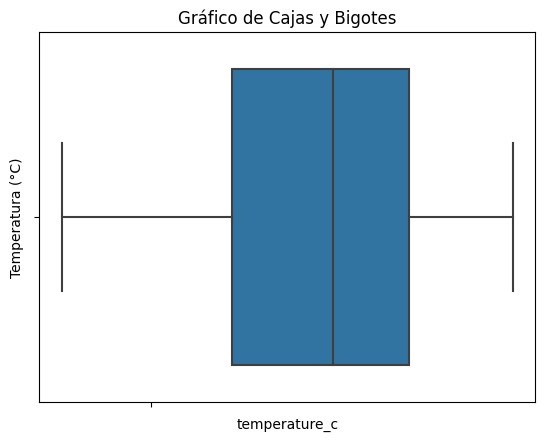

In [ ]:
# Crear un diagrama de cajas y bigotes con Seaborn
# TU CODIGO

# Remover el nombre de la columna del eje X
plt.xticks([0], [''])

# Agregar título y etiquetas
plt.title('Gráfico de Cajas y Bigotes')
plt.ylabel('Temperatura (°C)')

### **Barras**

Una gráfica de barras se utiliza para mostrar y comparar cantidades entre diferentes categorías. Cada barra representa una categoría, y su altura es proporcional al valor que representa.


In [ ]:
# Contar el tipo de tienda
tipo = # TU CODIGO

# Graficar el conteo de tipos de tienda en un gráfico de barras verticales
# TU CODIGO
plt.show()

In [ ]:
# Graficar el conteo de tipos de tienda en un gráfico de barras con Seaborn
# TU CODIGO

# Agregar título y etiquetas si lo deseas
plt.title('Conteo de tipos de tienda')
plt.xlabel('Tipo de tienda')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [ ]:
# Convertir is_holiday en categorica
festivo = # TU CODIGO

# Contar el tipo de tienda
conteo_festivo = # TU CODIGO

#Graficar el conteo de festivos en un gráfico de barras verticales
plt.barh(conteo_festivo.index, conteo_festivo.values)
plt.show()

In [ ]:
# Contar el tipo de festividad
conteo_festivo = # TU CODIGO
conteo_festivo.columns = ['Festivo', 'Conteo']

# Graficar el conteo de festividades en un gráfico de barras horizontal con Seaborn
# TU CODIGO

# Agregar título y etiquetas si lo deseas
plt.title('Conteo de festividades')
plt.xlabel('Conteo')
plt.ylabel('Festivo')

# Mostrar el gráfico
plt.show()

### **Otras forma de realizar gráficos de barras**

Aprenderemos a crear una tabla utilizando la función `pandas crosstab`. Utilizaremos una tabla para generar un gráfico de barras. A continuación, exploraremos un gráfico de barras generado con la biblioteca `seaborn` y calcularemos la distribución del promedio de `weekly_sales` según el `store`. Para ello, vamos a realizar los siguientes pasos:


In [ ]:
from numpy import median, mean

sns.set(style = "whitegrid")
ax = sns.barplot(# TU CODIGO);

* Ahora, veamos un gráfico de barras agrupada. Utilice el parámetro `hue` para trazar grupos anidados:

In [ ]:
ax = sns.barplot(# TU CODIGO);

* Si deseamos poner notas en diagrama de barras.

In [ ]:
from numpy import mean
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="store",
    y="weekly_sales",
    data=df,
    estimator=mean,
    color="#8FD694"
)

# Encuentra la tienda con mayores ventas promedio
mean_sales = df.groupby("store")["weekly_sales"].mean()
top_store = mean_sales.idxmax()
top_value = mean_sales.max()
x = list(mean_sales.index).index(top_store)  # posición de la barra en el eje x
y = top_value  # altura de la barra

# Anotación con nota visual
plt.annotate(
    'Excelente desempeño máximas ventas promedio',
    xy=(x, y),
    xytext=(x + 0.5, y + 2000),
    bbox=dict(boxstyle='round,pad=0.5', fc='lightyellow', ec='gold', lw=1.5),
    fontsize=10,
    arrowprops=dict(arrowstyle='->', color='red',linewidth=2),
)

plt.title("Promedio de ventas semanales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Weekly Sales")
plt.show()


### **Circulares**

Un diagrama circular (o gráfico de pastel) es una representación gráfica que muestra la proporción de diferentes categorías dentro de un conjunto de datos como segmentos de un círculo. Cada segmento del círculo representa una categoría y su tamaño es proporcional a su frecuencia o porcentaje en relación con el total.

In [ ]:
tipo = # TU CODIGO

# Graficar el conteo de tipos de tienda en un diagrama circular
plt.pie(tipo, labels=tipo.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(tipo))))
plt.title('Distribución de tipos de tienda')
plt.show()

Ahora haremos unas gráficas bivariadas.

### **Lineas**

Una gráfica de líneas conecta una serie de puntos de datos con líneas, generalmente utilizada para mostrar cambios o tendencias a lo largo del tiempo.


In [ ]:
# Convertir la columna date a formato de fecha
df['date'] =# TU CODIGO

# Agrupar las ventas por fecha, sumando las ventas semanales en las fechas repetidas
df_grouped = # TU CODIGO

df_grouped.head()

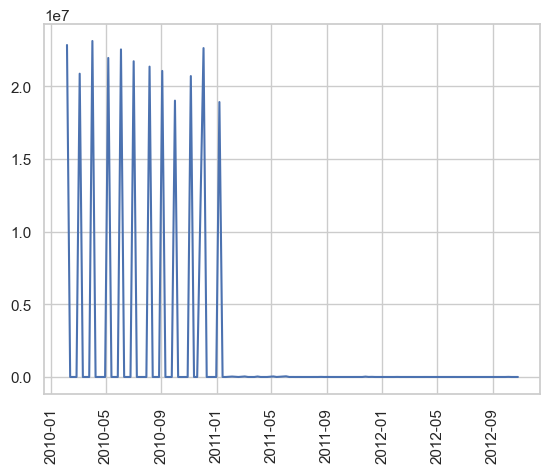

In [ ]:
# Crear un gráfico de líneas con las fechas agrupadas
# TU CODIGO

# Rotar las etiquetas del eje X para que se muestren en vertical
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

In [ ]:
# Crear un gráfico de líneas con las fechas agrupadas utilizando Seaborn
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
# TU CODIGO

# Rotar las etiquetas del eje X para que se muestren en vertical
plt.xticks(rotation=90)

# Agregar título y etiquetas si lo deseas
plt.title('Ventas semanales agrupadas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Ventas semanales')

# Mostrar el gráfico
plt.show()

### **Dispersión (Scatter Plots)**

Una gráfica de dispersión muestra la relación entre dos variables numéricas mediante puntos dispersos en un plano cartesiano.

In [ ]:
# Crear una gráfica de dispersión de ventas semanales vs. precio de la gasolina utilizando Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
# TU CODIGO

# Agregar título y etiquetas
plt.title('Relación entre ventas semanales y precio de la gasolina')
plt.xlabel('Ventas semanales ($)')
plt.ylabel('Precio de la gasolina (USD por litro)')

# Mostrar el gráfico
plt.show()

### **Histogramas con variable categórica**

Para hacer estos histogramas debemos tener una variable numérica según una variable categórica

In [ ]:
# Crear una superposición de histogramas de las ventas semanales según el tipo de tienda utilizando Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico

# Histograma para el tipo 'A'
sns.histplot(# TU CODIGO, color='blue', label='A', kde=False, alpha=0.7)

# Histograma para el tipo 'B'
sns.histplot(# TU CODIGO, color='red', label='B', kde=False, alpha=0.7)

# Agregar título y etiquetas
plt.title('Distribución de las ventas semanales según el tipo')
plt.xlabel('Ventas semanales ($)')
plt.ylabel('Frecuencia')

# Mostrar la leyenda
plt.legend()

### **Cajas y bigotes con variable categórica**

Para hacer estos diagramas de cajas y bigotes debemos tener una variable numérica según una variable categórica

In [ ]:
# Separar los datos por sexo
u_a = # TU CODIGO
u_b = # TU CODIGO

# Crear un diagrama de cajas y bigotes para 'height_cm' vs 'sex' usando pandas
plt.boxplot([u_a, u_b], labels=['A', 'B'])

# Agregar título y etiquetas
plt.title('Diagrama de cajas y bigotes: tasa de desempleo según el tipo')
plt.xlabel('Sexo')
plt.ylabel('Altura (cm)')

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear un diagrama de cajas y bigotes para 'unemployment' vs 'type' usando Seaborn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico

# TU CODIGO

# Agregar título y etiquetas
plt.title('Diagrama de cajas y bigotes: tasa de desempleo según el tipo')
plt.xlabel('Tipo de tienda')
plt.ylabel('Tasa de desempleo')

# Mostrar el gráfico
plt.show()

* ¿Y si pudiéramos obtener una pista sobre la distribución completa de una característica numérica específica agrupada por otras características categóricas? El tipo de técnica de visualización adecuada en este caso es un **gráfico de violín**. Un gráfico de violín es similar a un grafico de caja pero incluye más detalles sobre las variaciones de los datos.

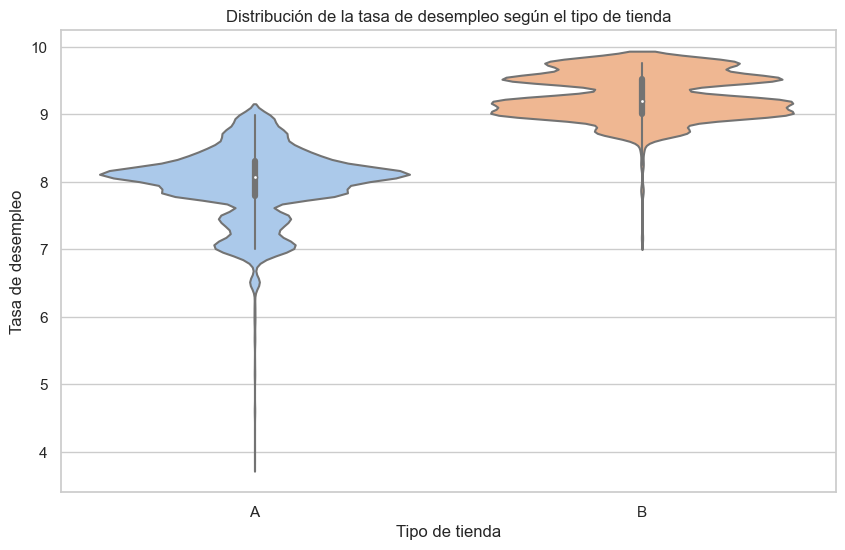

In [123]:
# Crear un diagrama de violín para 'unemployment' vs 'type'
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

sns.violinplot(x='type', y='unemployment', data=df, inner='box', palette='pastel')

# Agregar título y etiquetas
plt.title('Distribución de la tasa de desempleo según el tipo de tienda')
plt.xlabel('Tipo de tienda')
plt.ylabel('Tasa de desempleo')

# Mostrar el gráfico
plt.show()

### **Diagrama de barras con variables categóricas**

Realizaremos un diagrama de barras con dos variables categóricas



In [ ]:
# Convertimos 'is_holiday' a categoría con valores 'Holiday' y 'Non-Holiday'
df['is_holiday'] = # TU CODIGO

In [ ]:
# Contar la frecuencia de cada combinación de 'type' y 'is_holiday' y desapilamos
grouped_data = # TU CODIGO

# Crear el gráfico de barras sin apilar
grouped_data.plot(kind='bar', stacked=False)

# Personalización del gráfico
plt.title('Frecuencia de tipo en función de los dias feriados o no')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

Para exportar las gráficas en formato png. Usamos `savefig`:

In [ ]:
# Contar la frecuencia de cada combinación de 'type' y 'is_holiday' y desapilamos
grouped_data = df.groupby(['type', 'is_holiday'], observed=True).size().unstack()

# Crear el gráfico de barras sin apilar
grouped_data.plot(kind='bar', stacked=False)

# Personalización del gráfico
plt.title('Frecuencia de tipo en función de los dias feriados o no')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# exportar la figura
plt.savefig('_image/grafica_1.png',transparent=False)

# exportar la figura con transparencia
plt.savefig('_image/grafica_2.png', transparent=True)



### **Diagrama hexagonal**

Existe una versión más elegante de los gráficos de dispersión, llamada `hexagonal binning plot` (`hexbin plot`). En este ejercicio, utilizaremos `Seaborn` para crear una gráfica de dispersión hexagonal (`Hexbin Plot`) que muestre la relación entre las **ventas semanales** (`weekly_sales`) y el precio de la gasolina en **USD por litro** (`fuel_price_usd_per_l`). Este gráfico es útil para representar la densidad de datos cuando estos se superponen.


1. Importemos las bibliotecas necesarias:

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

2.  Usaremos `sns.scatterplot` para crear una gráfica de dispersión, y añadiremos un esquema de color personalizado para mejorar la visualización.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Establecer el estilo de los gráficos
sns.set(style="ticks")

# Crear el gráfico hexbin
# TU CODIGO

# Mostrar el gráfico
plt.show()

### **Diagrama de contorno**

Los gráficos de contorno son útiles cuando los puntos de datos están densamente poblados en ciertas áreas, ya que muestran la concentración de los datos mediante líneas de contorno. En este ejercicio, crearemos un gráfico de contorno para analizar la relación entre las **ventas semanales** (`weekly_sales`) y el **precio de la gasolina en USD por litro** (`fuel_price_usd_per_l`).

1.  Importar las bibliotecas necesarias:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

2. Utilizaremos el método `sns.kdeplot()` para generar un gráfico de contorno con las ventas semanales y el precio de la gasolina, y rellenar las áreas con gradientes de color para reflejar la densidad de puntos.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Establecer el estilo de los gráficos
sns.set_style("white")

# Crear el gráfico de contorno con densidad del núcleo (KDE)
# TU CODIGO

# Añadir título y etiquetas descriptivas
plt.title('Relación entre ventas semanales y precio de la gasolina')
plt.xlabel('Ventas semanales ($)')
plt.ylabel('Precio de la gasolina (USD por litro)')

# Mostrar el gráfico
plt.show()


## **Exploración de Datos con `ydata-profiling`**

### **¿Qué es `ydata-profiling`?**

`ydata-profiling` es una herramienta de Python que genera **informes exploratorios automáticos y visuales** a partir de un DataFrame de `pandas`.

Su objetivo es facilitar la **exploración inicial de datos (EDA)**, mostrando estadísticas, valores nulos, duplicados, correlaciones y más, todo en un informe HTML.

### **¿Qué incluye el informe?**

- Estadísticas descriptivas (media, mediana, desvío estándar, etc.)
- Detección de valores faltantes y duplicados
- Tipos de datos por variable
- Distribuciones y gráficos por variable
- Matriz de correlaciones
- Alertas de calidad de datos
- Recomendaciones para limpieza

:::{admonition} **Ventajas**
:class: note

- Rápido y automático
- Visual e interactivo
- Exportable como HTML
- Ideal para auditoría de datos
- Muy útil en las primeras etapas de un análisis
- `ydata-profiling` es ideal para **ahorrar tiempo** en la etapa de análisis exploratorio y para generar documentación de tus datos que sea clara y compartible.

:::

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

filename = 'C:/GitHub/Datos/datamanip/bank/bank-full.csv'
df = pd.read_csv(filename,sep=';')

profile = ProfileReport(df,title='Informe de los datos', explorative = True)
profile.to_notebook_iframe()